<!--<img width=700px; src="../img/logoUPSayPlusCDS_990.png"> -->

<p style="margin-top: 3em; margin-bottom: 2em;"><b><big><big><big><big>Introduction to Pandas</big></big></big></big></b></p>

In [103]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 1000

# 1. Pandas: package for data analysis in python

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

What is `pandas`?

* Pandas can be thought of as *arrays/lists with labels* for rows and columns, and better support for heterogeneous data types.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

It's  documentation: http://pandas.pydata.org/pandas-docs/stable/


** When do you need pandas? **

When working with **tabular or structured data** (like SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)



In [ ]:
# To import pandas 
import pandas as pd

# 2. The pandas data structures: `DataFrame` and `Series`

A `DataFrame` is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, similar to a spreadsheet or a database table. You can think of it as multiple Series object which share the same index.


<img align="left" width=50% src="img/dataframe.png">

### let's read in titanic data from a CSV file

In [2]:
df = pd.read_csv("data/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<img src="img/titanic_data2.png">

In [4]:
type(df)

pandas.core.frame.DataFrame

### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [5]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

To check the data types of the different columns:

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Dimensions of the data can be seen using 'shape' attribute

In [12]:
df.shape

(891, 12)

### One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labeled data**.

In [13]:
df['Age'] ## to access a single column in a dataframe (which is called a series)

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
5        NaN
6      54.00
7       2.00
8      27.00
9      14.00
10      4.00
11     58.00
12     20.00
13     39.00
14     14.00
15     55.00
16      2.00
17       NaN
18     31.00
19       NaN
20     35.00
21     34.00
22     15.00
23     28.00
24      8.00
25     38.00
26       NaN
27     19.00
28       NaN
29       NaN
30     40.00
31       NaN
32       NaN
33     66.00
34     28.00
35     42.00
36       NaN
37     21.00
38     18.00
39     14.00
40     40.00
41     27.00
42       NaN
43      3.00
44     19.00
45       NaN
46       NaN
47       NaN
48       NaN
49     18.00
50      7.00
51     21.00
52     49.00
53     29.00
54     65.00
55       NaN
56     21.00
57     28.50
58      5.00
59     11.00
60     22.00
61     38.00
62     45.00
63      4.00
64       NaN
65       NaN
66     29.00
67     19.00
68     17.00
69     26.00
70     32.00
71     16.00
72     21.00
73     26.00
74     32.00
75     25.00
76       NaN

In [14]:
age = df['Age'] ## assigning the series to a variable 

### Attributes of a Series: `index` and `values`

The Series has also an `index` attribute, but no `columns` attributes

In [15]:
age.index

RangeIndex(start=0, stop=891, step=1)

In [16]:
age.shape

(891,)

We can slice the series, similar to lists:

In [17]:
age[0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

We can access series values via the index:

In [22]:
age[0]

22.0

The index can be something other than integers:

In [ ]:
df.head()

In [23]:
df = df.set_index('Name')
df

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.00,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.00,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.00,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.00,0,0,373450,8.0500,NaN,S
"Moran, Mr. James",6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
"McCarthy, Mr. Timothy J",7,0,1,male,54.00,0,0,17463,51.8625,E46,S
"Palsson, Master. Gosta Leonard",8,0,3,male,2.00,3,1,349909,21.0750,NaN,S
"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,3,female,27.00,0,2,347742,11.1333,NaN,S


In [24]:
age = df['Age']
age

Name
Braund, Mr. Owen Harris                                                               22.00
Cumings, Mrs. John Bradley (Florence Briggs Thayer)                                   38.00
Heikkinen, Miss. Laina                                                                26.00
Futrelle, Mrs. Jacques Heath (Lily May Peel)                                          35.00
Allen, Mr. William Henry                                                              35.00
Moran, Mr. James                                                                        NaN
McCarthy, Mr. Timothy J                                                               54.00
Palsson, Master. Gosta Leonard                                                         2.00
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)                                     27.00
Nasser, Mrs. Nicholas (Adele Achem)                                                   14.00
Sandstrom, Miss. Marguerite Rut                                            

In [25]:
age['Dooley, Mr. Patrick']

32.0

 ## element-wise operations:

In [26]:
age * 1000 

Name
Braund, Mr. Owen Harris                                                               22000.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)                                   38000.0
Heikkinen, Miss. Laina                                                                26000.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)                                          35000.0
Allen, Mr. William Henry                                                              35000.0
Moran, Mr. James                                                                          NaN
McCarthy, Mr. Timothy J                                                               54000.0
Palsson, Master. Gosta Leonard                                                         2000.0
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)                                     27000.0
Nasser, Mrs. Nicholas (Adele Achem)                                                   14000.0
Sandstrom, Miss. Marguerite Rut                        

A range of methods can be applied to the series (like mean):

In [27]:
age.mean()

29.69911764705882

We can also index with a boolean:

In [28]:
age[age > 70]

Name
Goldschmidt, Mr. George B               71.0
Connors, Mr. Patrick                    70.5
Artagaveytia, Mr. Ramon                 71.0
Barkworth, Mr. Algernon Henry Wilson    80.0
Svensson, Mr. Johan                     74.0
Name: Age, dtype: float64

Counts of unique values using 'value counts':

In [29]:
df['Embarked'].value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Find value counts of the Gender column</li>
</ul>
</div>

In [31]:
# %load snippets/01-pandas_introduction30.py


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the maximum Fare that was paid? And the median?</li>
</ul>
</div>

In [ ]:
# %load snippets/01-pandas_introduction31.py


In [ ]:
# %load snippets/01-pandas_introduction32.py


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers (note: the 'Survived' column indicates whether someone survived (1) or not (0)).</li>
</ul>
</div>

In [ ]:
# %load snippets/01-pandas_introduction33.py


# 3. Data import and export

A wide range of input/output formats are natively supported by pandas:

* CSV
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* sas, stata
* parquet
* ...

Very powerful csv reader:

In [32]:
pd.read_csv?

Luckily, if we have a well formed csv file, we don't need many of those arguments:

In [33]:
df = pd.read_csv("data/titanic.csv")

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Let us try to import a not so well formed file

In [35]:
no2 = pd.read_csv('data/20000101_20161231-NO2.csv')
no2.head()

,timestamp;BASCH;BONAP;PA18;VERS
0,;microg/m3;microg/m3;microg/m3;microg/m3
1,2000-01-01 01:00:00;108.0;n/d;65.0;47.0
2,2000-01-01 02:00:00;104.0;60.0;77.0;42.0
3,2000-01-01 03:00:00;97.0;58.0;73.0;34.0
4,2000-01-01 04:00:00;77.0;52.0;57.0;29.0


<div class="alert alert-success">

Some aspects about the file:
 <ul>
  <li>Which separator is used in the file?</li>
  <li>The second row includes unit information and should be skipped (check `skiprows` keyword)</li>
  <li>For missing values, it uses the `'n/d'` notation (check `na_values` keyword)</li>
  <li>We want to parse the 'timestamp' column as datetimes (check the `parse_dates` keyword)</li>
</ul>
</div>

In [36]:
#Load the data using proper formatting
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col = 0, parse_dates=True)

Apart from importing your data from an external source (text file, excel, database, ..), one of the most common ways of creating a dataframe is from a dictionary of lists.


In [ ]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

# 4. Exploring the data

### Let's again focus on Titanic Dataset

In [37]:
df = pd.read_csv("data/titanic.csv")

In [38]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### Several ways to get more insight into the data:

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Gender         891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Quick plotting can be done on pandas series:

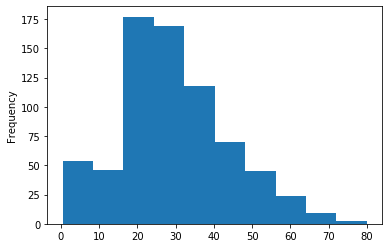

In [41]:
df['Age'].plot(kind = 'hist')

<div class="alert alert-success">

<b>EXERCISE</b>: 

 <ul>
  <li>Plot the Fare distribution of the titanic passengers</li>
</ul>
</div>

In [ ]:
# %load snippets/01-pandas_introduction46.py


# 5. Selecting and filtering data

<div class="alert alert-warning">
<b>ATTENTION!</b>: 

One of pandas' basic features is the labeling of rows and columns

 <ul>
  <li>selection by **label**</li>
  <li>selection by **position**</li>
</ul>
</div>

In [42]:
df = pd.read_csv("data/titanic.csv")

### `df[]` provides some convenience shortcuts 

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [43]:
df['Age']

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
5        NaN
6      54.00
7       2.00
8      27.00
9      14.00
10      4.00
11     58.00
12     20.00
13     39.00
14     14.00
15     55.00
16      2.00
17       NaN
18     31.00
19       NaN
20     35.00
21     34.00
22     15.00
23     28.00
24      8.00
25     38.00
26       NaN
27     19.00
28       NaN
29       NaN
30     40.00
31       NaN
32       NaN
33     66.00
34     28.00
35     42.00
36       NaN
37     21.00
38     18.00
39     14.00
40     40.00
41     27.00
42       NaN
43      3.00
44     19.00
45       NaN
46       NaN
47       NaN
48       NaN
49     18.00
50      7.00
51     21.00
52     49.00
53     29.00
54     65.00
55       NaN
56     21.00
57     28.50
58      5.00
59     11.00
60     22.00
61     38.00
62     45.00
63      4.00
64       NaN
65       NaN
66     29.00
67     19.00
68     17.00
69     26.00
70     32.00
71     16.00
72     21.00
73     26.00
74     32.00
75     25.00
76       NaN

or multiple columns:

In [44]:
df[['Age', 'Fare']]

,Age,Fare
0,22.00,7.2500
1,38.00,71.2833
2,26.00,7.9250
3,35.00,53.1000
4,35.00,8.0500
5,NaN,8.4583
6,54.00,51.8625
7,2.00,21.0750
8,27.00,11.1333
9,14.00,30.0708


But, slicing accesses the rows:

In [45]:
df[10:15]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


### Systematic indexing with `loc` and `iloc`

When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [46]:
df = pd.read_csv("data/titanic.csv")

In [47]:
df = df.set_index('Name')

In [48]:
df.head()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.loc['Braund, Mr. Owen Harris', 'Fare']

7.25

In [54]:
df.loc['Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan', :]

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Bonnell, Miss. Elizabeth",12,1,1,female,58.0,0,0,113783,26.550,C103,S
"Saundercock, Mr. William Henry",13,0,3,male,20.0,0,0,A/5. 2151,8.050,NaN,S
"Andersson, Mr. Anders Johan",14,0,3,male,39.0,1,5,347082,31.275,NaN,S


Selecting by position with `iloc` works similar as indexing numpy arrays:

In [55]:
df.iloc[0:2,1:3]

,Survived,Pclass
Name,,
"Braund, Mr. Owen Harris",0,3
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1


The different indexing methods can also be used to assign data:

In [56]:
df.loc['Braund, Mr. Owen Harris', 'Survived'] = 100

In [57]:
df.iloc[0:2,1:3]

,Survived,Pclass
Name,,
"Braund, Mr. Owen Harris",100,3
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1


### Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' (like a where clause in SQL). 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [ ]:
# df['Fare'] > 50

In [58]:
df[df['Fare'] > 50]

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.00,1,0,PC 17599,71.2833,C85,C
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.00,1,0,113803,53.1000,C123,S
"McCarthy, Mr. Timothy J",7,0,1,male,54.00,0,0,17463,51.8625,E46,S
"Fortune, Mr. Charles Alexander",28,0,1,male,19.00,3,2,19950,263.0000,C23 C25 C27,S
"Spencer, Mrs. William Augustus (Marie Eugenie)",32,1,1,female,NaN,1,0,PC 17569,146.5208,B78,C
"Meyer, Mr. Edgar Joseph",35,0,1,male,28.00,1,0,PC 17604,82.1708,NaN,C
"Holverson, Mr. Alexander Oskar",36,0,1,male,42.00,1,0,113789,52.0000,NaN,S
"Harper, Mrs. Henry Sleeper (Myna Haxtun)",53,1,1,female,49.00,1,0,PC 17572,76.7292,D33,C
"Ostby, Mr. Engelhart Cornelius",55,0,1,male,65.00,0,1,113509,61.9792,B30,C


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, select all rows for male passengers and calculate the mean age of those passengers. Do the same for the female passengers</li>
</ul>
</div>

In [ ]:
df = pd.read_csv("data/titanic.csv")

In [ ]:
df.head()

In [ ]:
# %load snippets/01-pandas_introduction63.py


In [ ]:
# %load snippets/01-pandas_introduction64.py


In [ ]:
# %load snippets/01-pandas_introduction65.py


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, how many passengers older than 70 were on the Titanic?</li>
</ul>
</div>

In [ ]:
# %load snippets/01-pandas_introduction66.py


In [ ]:
# %load snippets/01-pandas_introduction67.py


# 6. The group-by operation

### Some 'theory': the groupby operation (split-apply-combine)

In [59]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


###  aggregating functions:

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [60]:
df['data'].sum()

90

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups, we could do the following:

In [61]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

### Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

In [62]:
df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

And many more methods are available. 

In [63]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [64]:
df.groupby('key').agg(np.sum)  # 'sum'

,data
key,
A,15
B,30
C,45


### Application of the groupby concept on the titanic data

We go back to the titanic passengers survival data:

In [65]:
df = pd.read_csv("data/titanic.csv")

In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average age for each Gender again,  using groupby.</li>
</ul>
</div>

In [72]:
# %load snippets/01-pandas_introduction76.py


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers.</li>
</ul>
</div>

In [73]:
# %load snippets/01-pandas_introduction77.py


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate this survival ratio for all passengers younger that 25 (remember: filtering/boolean indexing).</li>
</ul>
</div>

In [74]:
# %load snippets/01-pandas_introduction78.py


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the difference in the survival ratio between the Genders?</li>
</ul>
</div>

In [ ]:
# %load snippets/01-pandas_introduction79.py


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Or how does it differ between the different classes? Make a bar plot visualizing the survival ratio for the 3 classes.</li>
</ul>
</div>

In [75]:
# %load snippets/01-pandas_introduction80.py


# 7. Working with time series data

In [76]:
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

This dataset is :
AirBase (The European Air quality dataBase): hourly measurements of all air quality monitoring stations from Europe.

In [77]:
no2.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


###  Exploring the data

Some useful methods:

`head` and `tail`

In [78]:
no2.head(3)

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0


In [79]:
no2.tail()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2016-12-31 19:00:00,77.0,49.0,52.0,23.0
2016-12-31 20:00:00,73.0,51.0,49.0,20.0
2016-12-31 21:00:00,61.0,51.0,48.0,16.0
2016-12-31 22:00:00,57.0,49.0,45.0,14.0
2016-12-31 23:00:00,51.0,47.0,45.0,12.0


`info()`

In [80]:
no2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149039 entries, 2000-01-01 01:00:00 to 2016-12-31 23:00:00
Data columns (total 4 columns):
BASCH    139949 non-null float64
BONAP    136493 non-null float64
PA18     142259 non-null float64
VERS     143813 non-null float64
dtypes: float64(4)
memory usage: 5.7 MB


Getting some basic summary statistics about the data with `describe`:

In [81]:
no2.describe()

,BASCH,BONAP,PA18,VERS
count,139949.000000,136493.000000,142259.000000,143813.000000
mean,89.270098,64.001714,45.104211,27.613227
std,36.772855,27.866767,23.212719,19.604953
min,4.000000,0.000000,2.000000,0.000000
25%,63.000000,44.000000,28.000000,13.000000
50%,87.000000,62.000000,42.000000,22.000000
75%,112.000000,81.000000,59.000000,38.000000
max,358.000000,345.000000,306.000000,197.000000


Quickly visualizing the data

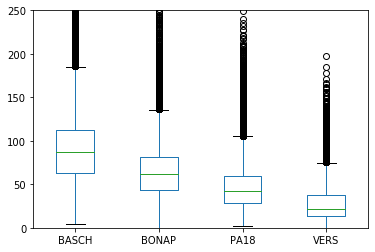

In [82]:
no2.plot(kind='box', ylim=[0,250])

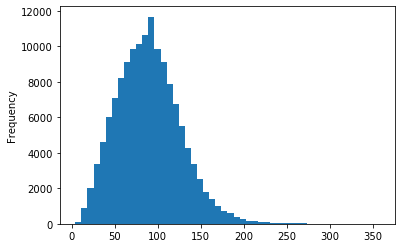

In [83]:
no2['BASCH'].plot(kind='hist', bins=50)

The default plot (when not specifying `kind`) is a line plot of all columns:

This does not say too much ..

We can select part of the data (eg the latest 500 data points):

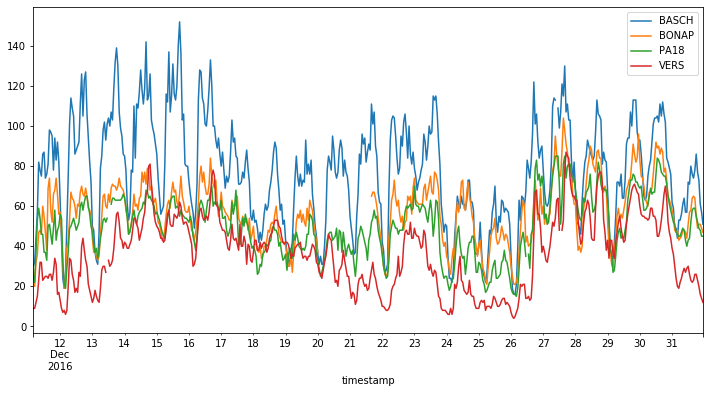

In [84]:
no2[-500:].plot(figsize=(12,6))

Or we can use some more advanced time series features -> see further in this notebook!

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [85]:
no2.index

DatetimeIndex(['2000-01-01 01:00:00', '2000-01-01 02:00:00',
               '2000-01-01 03:00:00', '2000-01-01 04:00:00',
               '2000-01-01 05:00:00', '2000-01-01 06:00:00',
               '2000-01-01 07:00:00', '2000-01-01 08:00:00',
               '2000-01-01 09:00:00', '2000-01-01 10:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=149039, freq=None)

Indexing a time series works with strings:

In [86]:
no2["2010-01-01 09:00": "2010-01-01 12:00"]

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2010-01-01 09:00:00,31.0,27.0,28.0,14.0
2010-01-01 10:00:00,41.0,31.0,30.0,14.0
2010-01-01 11:00:00,48.0,32.0,33.0,16.0
2010-01-01 12:00:00,63.0,33.0,39.0,19.0


A nice feature is "partial string" indexing, so you don't need to provide the full datetime string.

E.g. all data of January up to March 2012:

In [89]:
no2['2012':'2013-03']

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2012-01-01 00:00:00,44.0,34.0,32.0,7.0
2012-01-01 01:00:00,56.0,35.0,29.0,9.0
2012-01-01 02:00:00,50.0,36.0,29.0,7.0
2012-01-01 03:00:00,46.0,34.0,22.0,8.0
2012-01-01 04:00:00,47.0,29.0,21.0,12.0
...,...,...,...,...
2013-03-31 19:00:00,80.0,84.0,46.0,36.0
2013-03-31 20:00:00,72.0,75.0,43.0,33.0
2013-03-31 21:00:00,66.0,70.0,40.0,36.0


Time and date components can be accessed from the index:

In [90]:
no2.index.hour

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='timestamp', length=149039)

In [91]:
no2.index.year

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='timestamp', length=149039)

## Converting your time series with `resample`

A very powerfull method is **`resample`: converting the frequency of the time series** (e.g. from hourly to daily data).

Remember the air quality data:

In [92]:
no2.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


The time series has a frequency of 1 hour. I want to change this to daily:

In [93]:
no2.resample('D').mean().head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01,83.173913,53.772727,64.695652,36.521739
2000-01-02,78.708333,59.250000,63.708333,17.166667
2000-01-03,82.333333,73.541667,61.000000,23.083333
2000-01-04,78.500000,73.708333,48.863636,23.791667
2000-01-05,94.291667,90.458333,60.166667,28.214286


Above I take the mean, but as with `groupby` I can also specify other methods:

In [ ]:
no2.resample('D').max().head()

The string to specify the new time frequency: https://stackoverflow.com/questions/17001389/pandas-resample-documentation
These strings can also be combined with numbers, eg `'10D'`.

Further exploring the data:

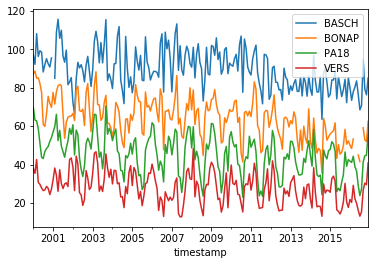

In [94]:
no2.resample('M').mean().plot() # 'A'

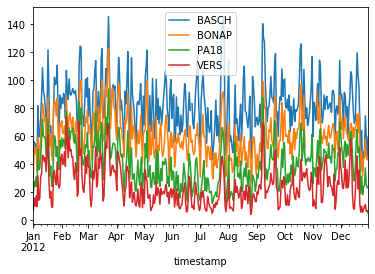

In [95]:
no2['2012'].resample('D').mean().plot()

<div class="alert alert-success">

<b>QUESTION</b>: The evolution of the yearly averages with the overall mean of all stations

 <ul>
  <li>Use `resample` and `plot` to plot the yearly averages for the different stations.</li>
  <li>The overall mean of all stations can be calculated by taking the mean of the different columns (`.mean(axis=1)`).</li>
</ul>
</div>

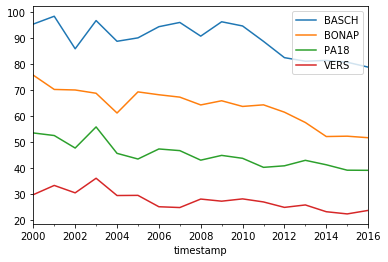

In [96]:
# %load snippets/01-pandas_introduction96.py
no2.resample('A').mean().plot()

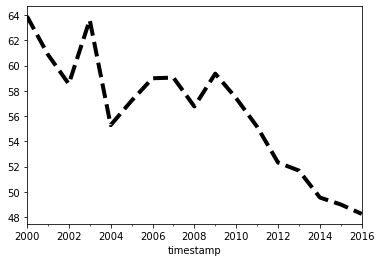

In [97]:
no2.mean(axis=1).resample('A').mean().plot(color='k', linestyle='--', linewidth=4)

<div class="alert alert-success">



 <ul>
  <li>Add a 'month' column to the dataframe.</li>
  <li>Group by the month to obtain the typical monthly averages over the different years.</li>
</ul>
</div>

First, we add a column to the dataframe that indicates the month (integer value of 1 to 12):

In [98]:
no2['month'] = no2.index.month

Now, we can calculate the mean of each month over the different years:

In [99]:
no2.groupby('month').mean()

,BASCH,BONAP,PA18,VERS
month,,,,
1,83.907542,65.387329,52.771067,30.995293
2,88.347532,67.387637,53.922040,33.890926
3,94.812926,73.588946,54.171491,35.508674
4,95.841468,71.824767,47.619196,30.184283
5,89.890137,63.924682,39.332258,23.140467
6,91.823459,62.299894,35.728969,21.506087
7,87.524715,55.383734,32.228277,19.059214
8,79.624439,50.918542,32.288458,19.327868
9,95.748555,65.478451,46.283842,29.060800


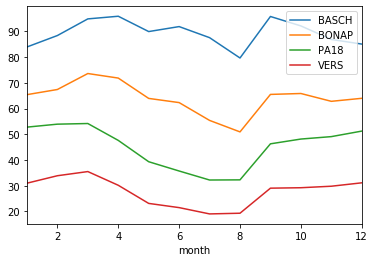

In [100]:
no2.groupby('month').mean().plot()

<div class="alert alert-success">

 <ul>
  <li>Similar as for the month, you can now group by the hour of the day.</li>
</ul>
</div>

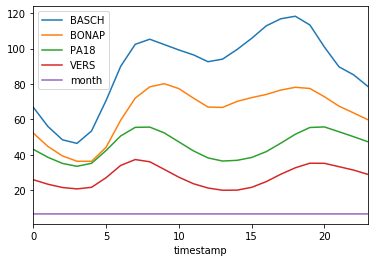

In [101]:
no2.groupby(no2.index.hour).mean().plot()

<div class="alert alert-success">

<b>Question</b>: What is the difference in the typical daily profile between week and weekend days for the 'BASCH' station.

 <ul>
  <li>Add a column 'weekday' defining the different days in the week.</li>
  <li>Add a column 'weekend' defining if a day is in the weekend (i.e. days 5 and 6) or not (True/False).</li>
  <li>You can groupby on multiple items at the same time. In this case you would need to group by both weekend/weekday and hour of the day.</li>
</ul>
</div>

Add a column indicating the weekday:

In [ ]:
no2['weekday'] = no2.index.weekday

Add a column indicating week/weekend

In [ ]:
no2['weekend'] = no2['weekday'].isin([5, 6])

Now we can groupby the hour of the day and the weekend:

In [ ]:
data_weekend = no2.groupby(['weekend', no2.index.hour]).mean()


In [ ]:
data_weekend

In [ ]:
data_weekend_BASCH = data_weekend['BASCH'].unstack(0)
data_weekend_BASCH.head()

In [ ]:
data_weekend_BASCH.plot()

<div class="alert alert-success">

<b>EXERCISE</b>: What are the number of exceedances of hourly values above the European limit 200 µg/m3 ?

Count the number of exceedances of hourly values above the European limit 200 µg/m3 for each year and station after 2005. Make a barplot of the counts. Add an horizontal line indicating the maximum number of exceedances (which is 18) allowed per year?
<br><br>

Hints:

 <ul>
  <li>Create a new DataFrame, called `exceedances`, (with boolean values) indicating if the threshold is exceeded or not</li>
  <li>Remember that the sum of True values can be used to count elements. Do this using groupby for each year.</li>
  <li>Adding a horizontal line can be done with the matplotlib function `ax.axhline`.</li>
</ul>
</div>

In [ ]:
# re-reading the data to have a clean version
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [ ]:
# %load snippets/01-pandas_introduction109.py


In [ ]:
# %load snippets/01-pandas_introduction110.py


In [ ]:
# %load snippets/01-pandas_introduction111.py


# 8. Dealing with missing data

In [ ]:
# re-reading the data to have a clean version
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [ ]:
no2.head()

In [ ]:
no2.shape

In [ ]:
no2.dropna?

In [ ]:
## to drop rows with any NA values
no2.dropna(how = 'any', subset = ['BONAP', 'PA18'])

# 9. What I didn't talk about - to be covered in session 2

- Concatenating data: `pd.concat`
- Merging and joining data: `pd.merge`
- Reshaping data using : Pivot tables `pd.pivot_table` and `stack`, `unstack`

- ...


## Further reading

* Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/

* Books

    * "Python for Data Analysis" by Wes McKinney
    * "Python Data Science Handbook" by Jake VanderPlas
